# Exercise 1 - Probability Theory and Statistics

## Problem 1

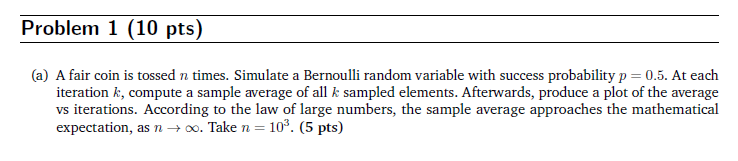

In [1]:
import numpy as np
import matplotlib.pyplot as plt

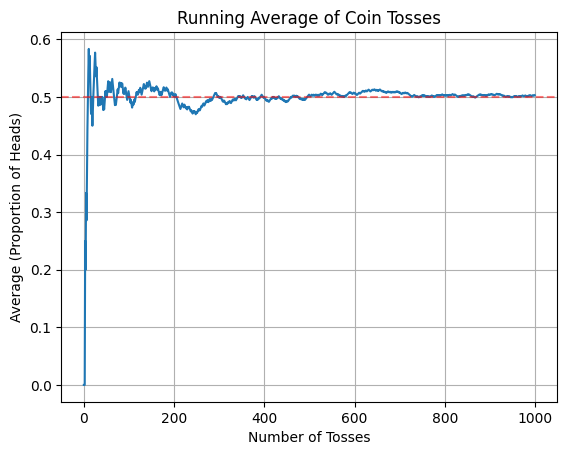

In [46]:
coin_results = np.random.choice(a=[0, 1], p=[0.5, 0.5], size=1000)

averages = [np.mean(coin_results[:i+1]) for i in range(1000)]

plt.plot(averages)
plt.title('Running Average of Coin Tosses')
plt.xlabel('Number of Tosses')
plt.ylabel('Average (Proportion of Heads)')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)


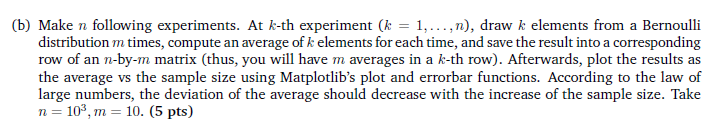

<ErrorbarContainer object of 3 artists>

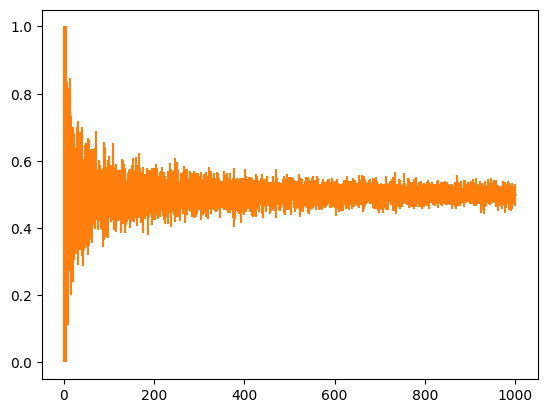

In [79]:

n=1000
m = 10

results = np.zeros((n, m))

for k in range(1, n+1):
    k_th_experiment = [np.mean(np.random.choice(a=[0,1], p=[0.5, 0.5], size=k)) for i in range(m)]
    results[k-1] = k_th_experiment

row_means = np.mean(results, axis=1)

y_errormin = row_means - np.min(results, axis=1)
y_errormax = np.max(results, axis=1) - row_means

y_error = [y_errormin, y_errormax]

plt.plot(range(1,n+1), row_means)
plt.errorbar(range(1,n+1), row_means, yerr=y_error)

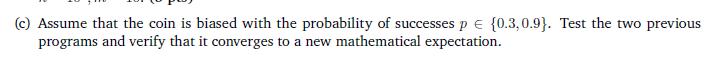

In [70]:
def plot_bernoulli(p):
    coin_results = np.random.choice(a=[0, 1], p=[1-p, p], size=1000)

    averages = [np.mean(coin_results[:i+1]) for i in range(1000)]

    plt.plot(averages)
    plt.title(f'Running Average of Coin Tosses (p = {p})')
    plt.xlabel('Number of Tosses')
    plt.ylabel('Average (Proportion of Heads)')
    plt.grid(True)
    plt.axhline(y=p, color='red', linestyle='--', alpha=0.5)


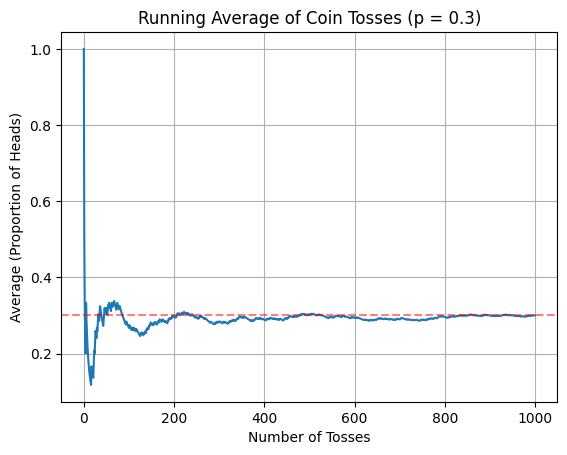

In [68]:
plot_bernoulli(0.3)

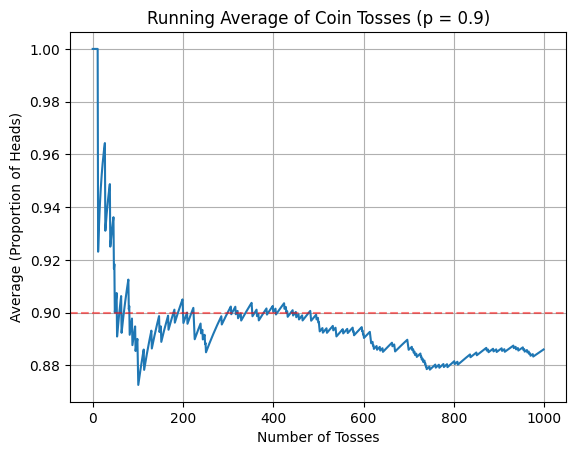

In [73]:
plot_bernoulli(0.9)

In [76]:
def plot_errorbar_bernoulli(p):
    
    n=1000
    m = 10

    results = np.zeros((n, m))

    for k in range(1, n+1):
        k_th_experiment = [np.mean(np.random.choice(a=[0,1], p=[1-p, p], size=k)) for i in range(m)]
        results[k-1] = k_th_experiment

    row_means = np.mean(results, axis=1)

    y_errormin = row_means - np.min(results, axis=1)
    y_errormax = np.max(results, axis=1) - row_means

    y_error = [y_errormin, y_errormax]

    plt.plot(range(1,n+1), row_means)
    plt.errorbar(range(1,n+1), row_means, yerr=y_error)

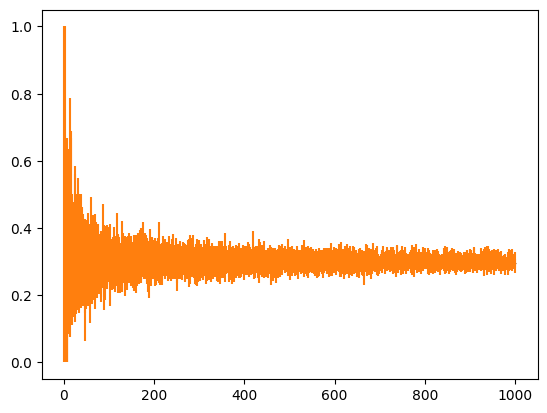

In [77]:
plot_errorbar_bernoulli(0.3)

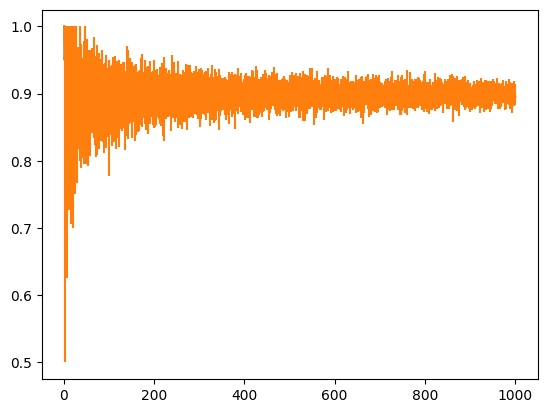

In [78]:
plot_errorbar_bernoulli(0.9)

## Problem 2

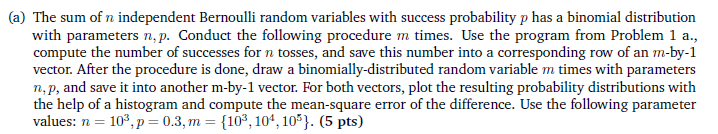

In [117]:
def mse(x):
    x_hat = np.mean(x)
    return np.mean(np.square(x - x_hat))

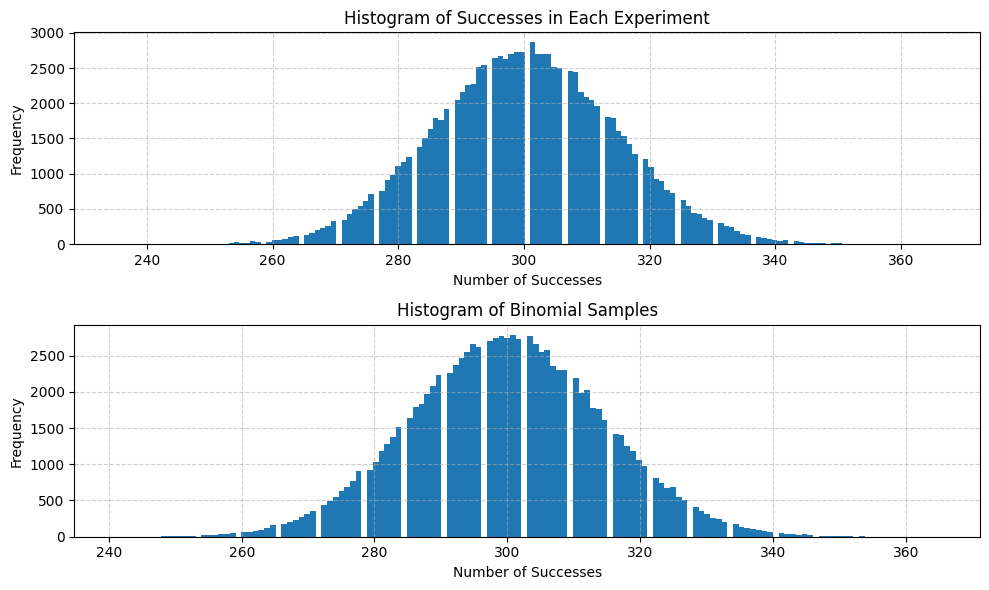

-0.12969
417.8943305039


In [135]:
n = 1000
p = 0.3
m = 100000

successes_of_each_experiment = np.zeros((1, m))

for i in range(m):
    coin_results = np.random.choice(a=[0, 1], p=[1-p, p], size=n)
    successes_of_each_experiment[0, i] = np.sum(coin_results)

binomial = np.random.binomial(n, p, size=m)

plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.hist(successes_of_each_experiment.T, bins='auto')
plt.title('Histogram of Successes in Each Experiment')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(212)
plt.hist(binomial, bins='auto')
plt.title('Histogram of Binomial Samples')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

difference_vector = binomial - successes_of_each_experiment
mse_difference = mse(binomial - successes_of_each_experiment)
print(np.mean(binomial - successes_of_each_experiment))
print(mse_difference)

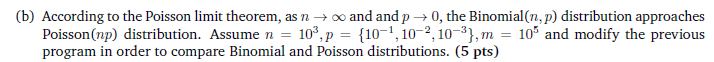